In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__


('2.2.3', '2.2.3', '0.13.2', '3.10.0')

In [3]:
df = pd.read_csv('Cars.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

# Exploratory Data Analysis (EDA)

In [8]:
# Mapping the owner with the unique numeric value and filling the null values Nan with 0.
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner_mapping)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [9]:
# Checking the fuel data
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [10]:
# Removed CNG and LPG from the fuel
df = df.query("fuel not in ['CNG', 'LPG']")
# Checking the values of the fuel after removing.
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [11]:
#  For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
# Checking the mileage data that shows in a rows
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [12]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)
# Checking the engine data that shows in a rows
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [13]:
##For the feature max_power, remove “bhp” and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
# Checking the max_power data that shows in a rows
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [14]:
##For the feature km_driven, converting the int to the column to numerical type (e.g., float)
df['km_driven'] = df['km_driven'].astype(float)
# Checking the max_power data that shows in a rows
df['km_driven'].head()

0    145500.0
1    120000.0
2    140000.0
3    127000.0
4    120000.0
Name: km_driven, dtype: float64

In [15]:
# Keeping first name of the brand and removing other values
df['name'] = df['name'].str.split(' ').str[0]
#str.split(' '): Splits each value in the brand column into a list of words based on spaces (e.g., ['Toyota', 'Corolla']).
#str[0]: Extracts the first word from the split list (e.g., Toyota).
#The updated brand column will now contain only the first word.

# Checking the brand value that shows in a rows
df['name'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: name, dtype: object

In [16]:
# Deleting the feature (column) torque
df = df.drop(columns=['torque'])

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500.0,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000.0,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000.0,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000.0,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000.0,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [18]:
# Deleteing the data of the "Test Drive Cars" from the feature owner.
df = df[df['owner'] != 5]
# Condition (df['car_name'] != 'Test Drive Cars'): Keeps only rows where the car_name is not equal to "Test Drive Cars."
# Update DataFrame: The DataFrame is updated to include only the rows that meet the condition.
# Checking the owner data
df['owner'].unique()

array([1, 2, 3, 4])

<Axes: xlabel='seller_type', ylabel='count'>

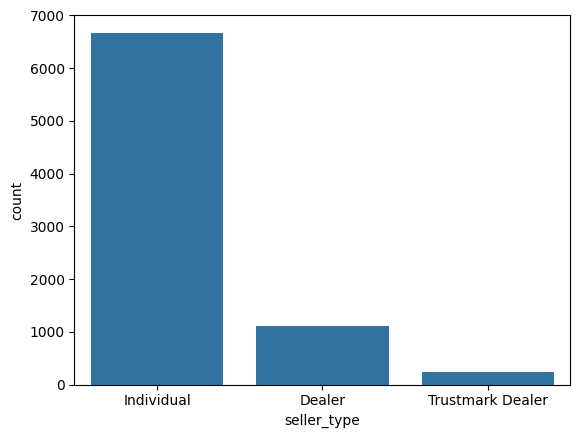

In [19]:
#scatter plot to see the seller_type
sns.countplot(data=df, x = 'seller_type')

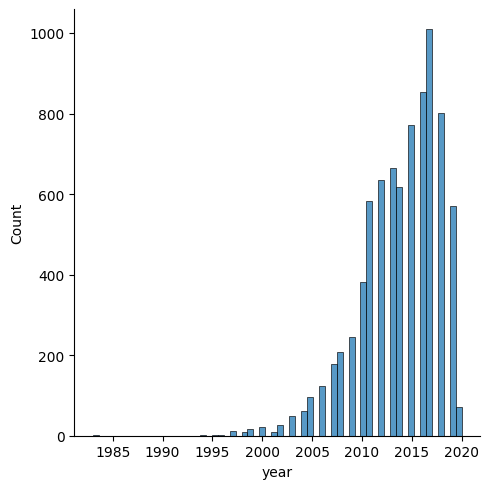

In [20]:
#Displot to show the year data 
sns.displot(data=df, x='year')

<Axes: xlabel='km_driven', ylabel='mileage'>

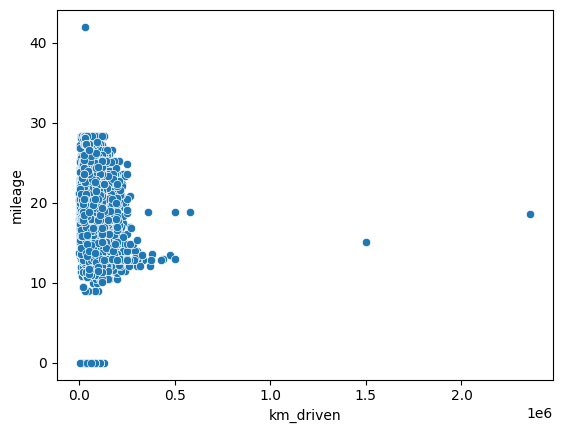

In [21]:
#scatter plot for km_driven vs mileage
sns.scatterplot(x = df['km_driven'], y = df['mileage'])

<Axes: xlabel='engine', ylabel='selling_price'>

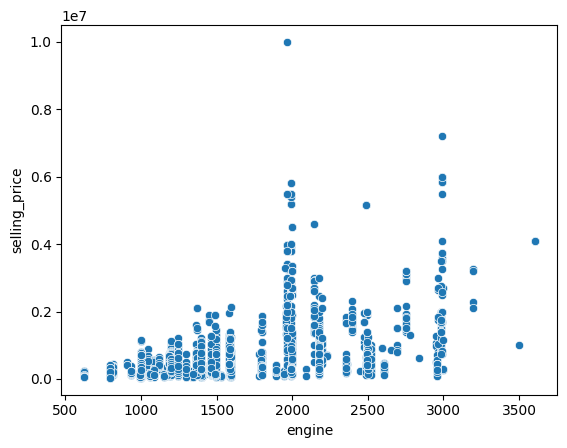

In [22]:
#scatter plot for engine vs selling price
sns.scatterplot(x = df['engine'], y = df['selling_price'])

<Axes: xlabel='fuel', ylabel='max_power'>

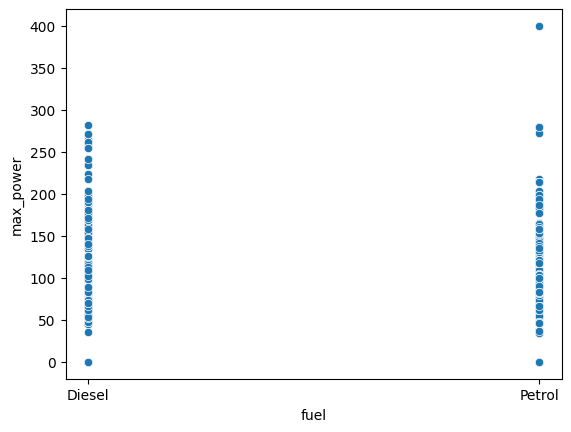

In [23]:
#scatter plot for fuel vs max_power
sns.scatterplot(x = df['fuel'], y = df['max_power'])

Text(0.5, 0, 'seller_type')

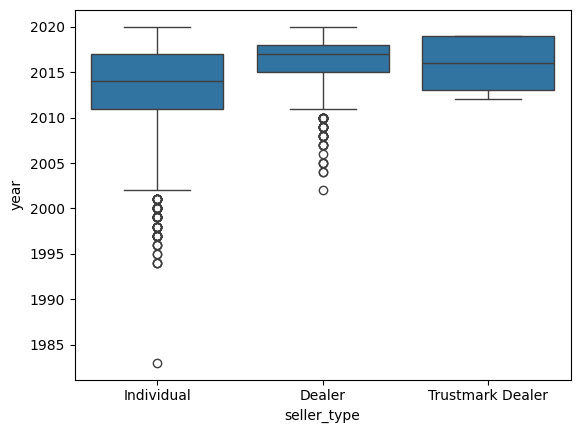

In [24]:
#Boxplot for sellet_type and year
sns.boxplot( x = df['seller_type'], y = df['year'])
plt.ylabel('year')
plt.xlabel('seller_type')

<Axes: xlabel='engine', ylabel='max_power'>

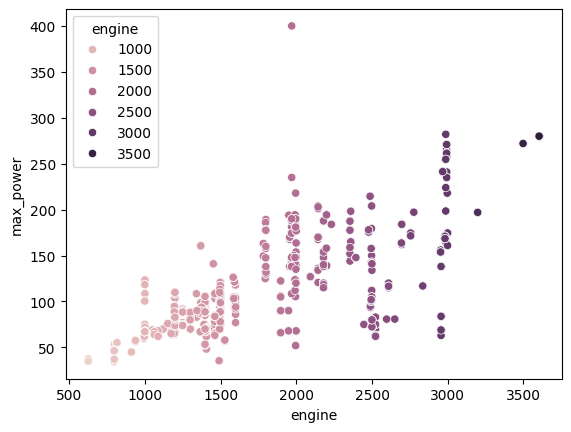

In [25]:
#Scatter plot for engine and max_power
sns.scatterplot(x = df['engine'], y = df['max_power'], hue=df['engine'])


## Correlation Matrix

### Label Encoder

In [26]:
#label Encoder for transmission 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [27]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'].unique()

array([0, 1])

In [29]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [30]:
# Creating a dummies data for previous data set
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix=['seller_type'])
print(df_encoded)

         name  year  selling_price  km_driven  fuel  transmission  owner  \
0      Maruti  2014         450000   145500.0     0             1      1   
1       Skoda  2014         370000   120000.0     0             1      2   
2       Honda  2006         158000   140000.0     1             1      3   
3     Hyundai  2010         225000   127000.0     0             1      1   
4      Maruti  2007         130000   120000.0     1             1      1   
...       ...   ...            ...        ...   ...           ...    ...   
8123  Hyundai  2013         320000   110000.0     1             1      1   
8124  Hyundai  2007         135000   119000.0     0             1      4   
8125   Maruti  2009         382000   120000.0     0             1      1   
8126     Tata  2013         290000    25000.0     0             1      1   
8127     Tata  2013         290000    25000.0     0             1      1   

      mileage  engine  max_power  seats  seller_type_Dealer  \
0       23.40  1248.0   

In [31]:
# Dropping the columns for brand name because it have no use
df_encoded = df_encoded.drop(columns=['name'])

In [32]:
df_encoded.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,2014,450000,145500.0,0,1,1,23.40,1248.0,74.00,5.0,False,True,False
1,2014,370000,120000.0,0,1,2,21.14,1498.0,103.52,5.0,False,True,False
2,2006,158000,140000.0,1,1,3,17.70,1497.0,78.00,5.0,False,True,False
3,2010,225000,127000.0,0,1,1,23.00,1396.0,90.00,5.0,False,True,False
4,2007,130000,120000.0,1,1,1,16.10,1298.0,88.20,5.0,False,True,False


<Axes: >

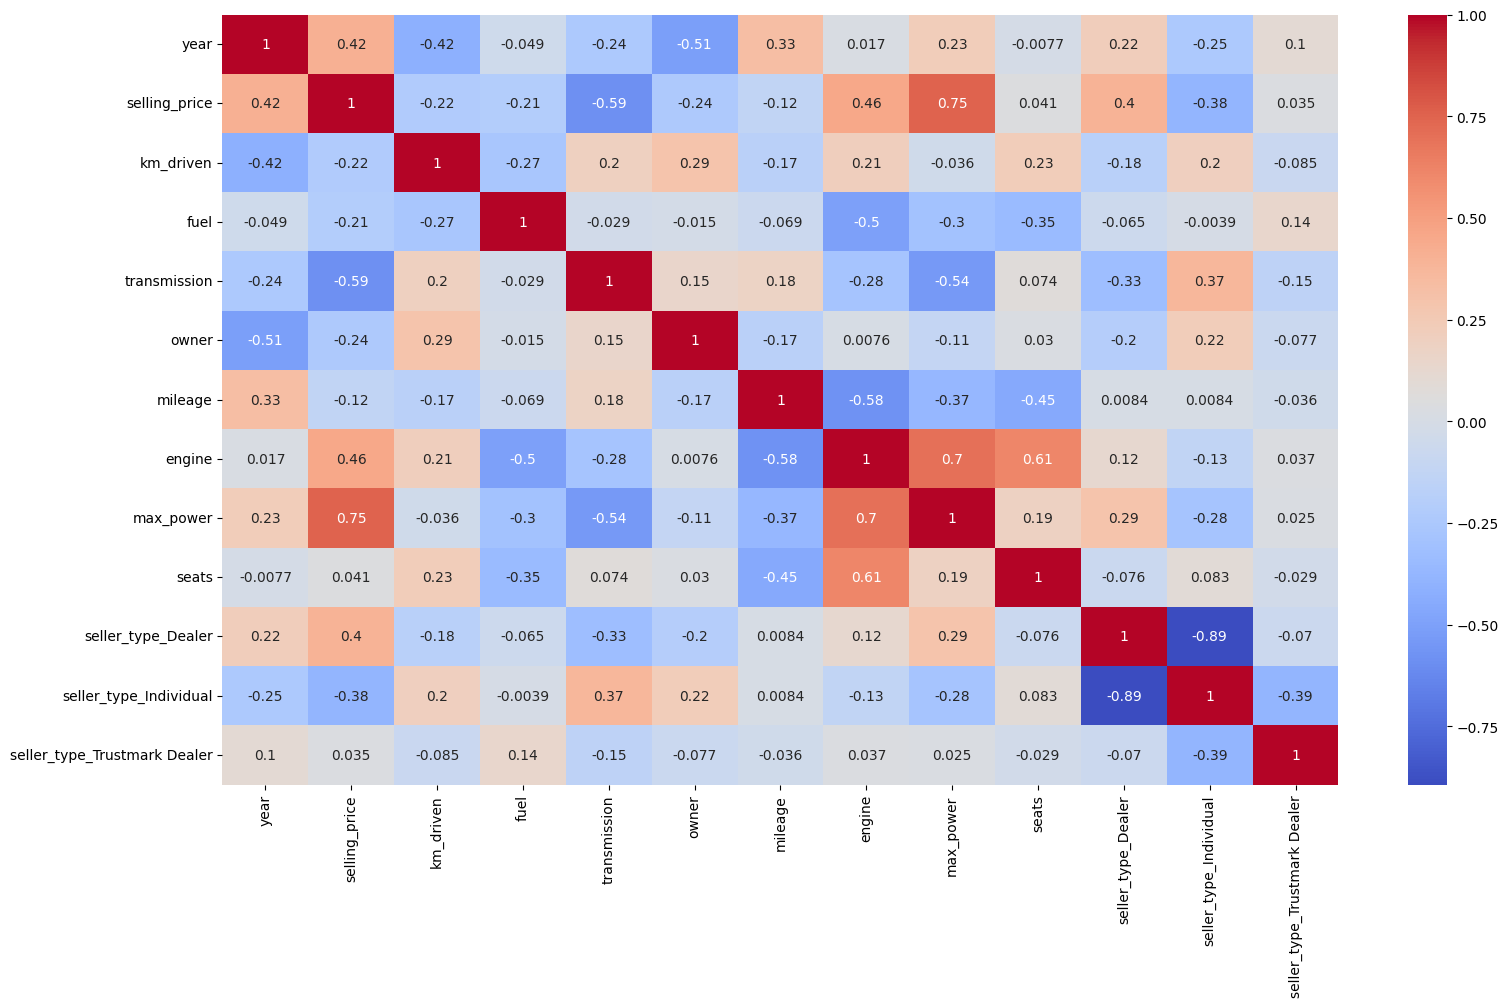

In [33]:
# Let's check out heatmap
plt.figure(figsize=(18,10)) 
sns.heatmap(df_encoded.corr(), annot=True, cmap= 'coolwarm')

## Binning 

Binning (or discretization) is a data preprocessing technique that transforms continuous numerical data into discrete categories (bins). It groups values into intervals, making it easier to analyze patterns and reduce complexity.



In [34]:
# df_encoded['selling_price'] = pd.cut(df_encoded['selling_price'], bins = 4, labels = [0, 1, 2, 3], include_lowest = True)
# doing .cut() resulted in a skewed distribution of the target variable
# selling_price
# 0    7732
# 1     182
# 2     113
# 3       1

# using .qcut() to divide the selling_price into 4 equal bins
# [   29999.,   260000.,   450000.,   680000., 10000000.]

df_encoded['selling_price'] = pd.qcut(df_encoded['selling_price'], q = 4, labels = [0, 1, 2, 3])
#df_encoded['selling_price']: This is the original numerical column containing selling prices.
#bins=4: This divides the range of selling_price into four equal-width bins.
#labels=[0, 1, 2, 3]: This assigns category labels (0, 1, 2, 3) to each bin.
#include_lowest=True: Ensures that the lowest value in selling_price is included in the first bin.

In [35]:
df_encoded['selling_price'].value_counts()

selling_price
0    2050
1    2044
3    1991
2    1943
Name: count, dtype: int64

# Feature Selection

In [36]:
#Identifying and selecting the most relevant variables to improve model performance

X = df_encoded[['engine', 'mileage', 'km_driven', 'year']]
assert len(X.shape) ==2

In [37]:
y = df_encoded['selling_price']
assert len(y.shape)  == 1

In [38]:
k = len(set(y))
k

4

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 16)
#Specifies that 30% of the data will be allocated to the test set, while the remaining 70% will go to the training set.
#Specifies that 30% of the data will be allocated to the test set, while the remaining 70% will go to the training set.

# Preprocessing

In [40]:
#check for null values
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       145
mileage      145
km_driven      0
year           0
dtype: int64

In [41]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       69
mileage      69
km_driven     0
year          0
dtype: int64

In [42]:
y_train.isna().sum()

np.int64(0)

In [43]:
y_test.isna().sum()

np.int64(0)

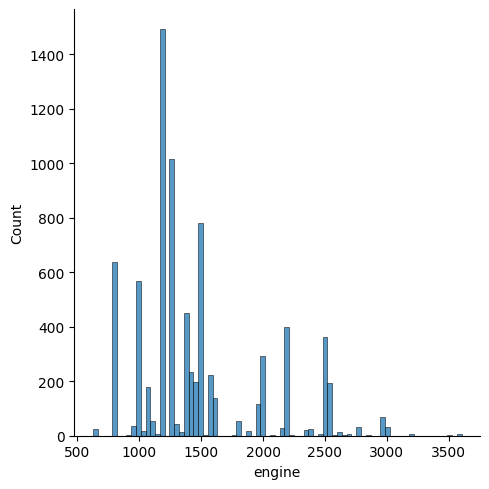

In [44]:
sns.displot(data=df_encoded, x='engine')

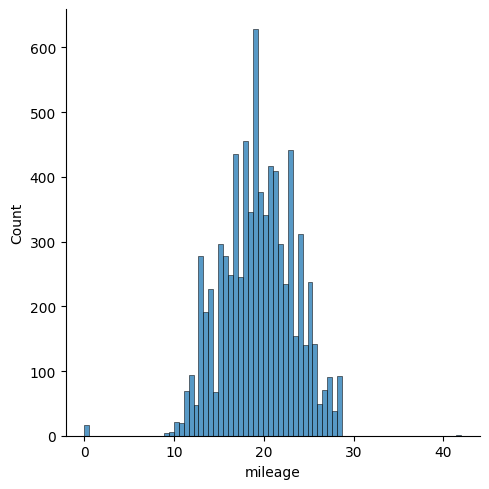

In [45]:
sns.displot(data=df_encoded, x='mileage')

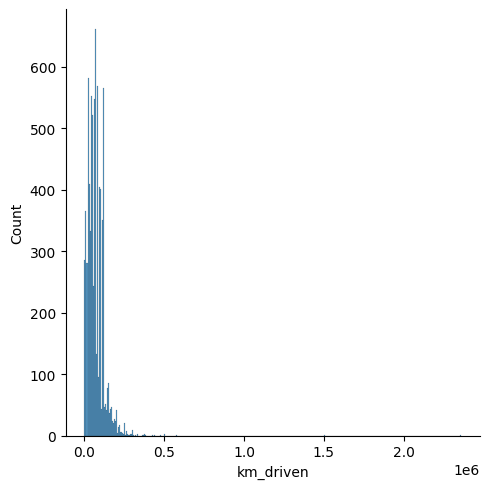

In [46]:
sns.displot(data=df_encoded, x='km_driven')

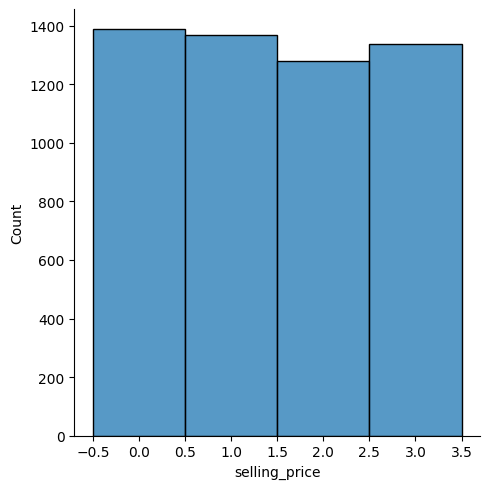

In [47]:
sns.displot(y_train)

In [48]:
# Calculating the median values for x_train and x_test and replacing missing values with median

# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [49]:
# Calculating the median values for x_train and x_test and replacing missing values with median

X_train['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)
X_test['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)

In [50]:
# Calculating the mean values for x_train and x_test and replacing missing values with mean

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [51]:
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()
#Looks at every cell in your training data (X_train) and marks it as True if it's empty (missing) or False if it's not.
#Counts how many True values (missing cells) there are in each column of your training data.

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [52]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

## Checking Outliners

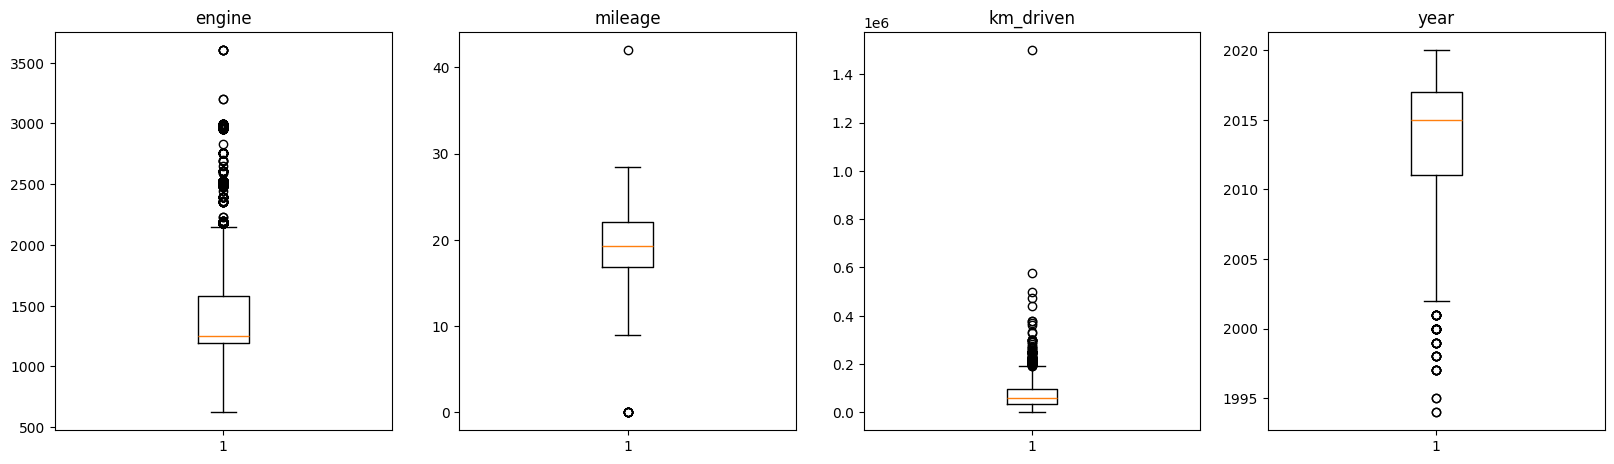

In [53]:
# Create a dictionary of columns.
col_dict = {'engine':1,'mileage':2, 'km_driven': 3, 'year':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [54]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [55]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 798
Percent of data that is outlier: 14.84%

---------------mileage---------------

Number of outliers: 10
Percent of data that is outlier: 0.19%

---------------km_driven---------------

Number of outliers: 117
Percent of data that is outlier: 2.18%

---------------year---------------

Number of outliers: 48
Percent of data that is outlier: 0.89%


## Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
#The MinMaxScaler in sklearn.preprocessing scales numerical features to a fixed range, typically between 0 and 1.
# Reason to use MinMaxScaler
# - Keeps Original Data Distribution (Does Not Change Shape)
# - Ensures Features Are in a Uniform Range (0 to 1)
# - Works Well When Min and Max Are Known
# - Prevents Negative Values (Useful for Certain Models)
# - Useful for Distance-Based Algorithms

no_of_cols = ['engine', 'mileage', 'km_driven', 'year']

# Create a MinMaxScaler to scale features to a specified range (0 to 1)
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[no_of_cols] = scaler.fit_transform(X_train[no_of_cols])
X_test[no_of_cols] = scaler.transform(X_test[no_of_cols])

# This applies the MinMaxScaler transformation to the no_of_cols (i.e., numerical columns) in the X_test dataset.
# The transformation scales the values in each column to a specified range (0 to 1, as defined earlier in MinMaxScaler(feature_range=(0, 1))).
# However, it uses the same scaling parameters (min and max values) that were computed from X_train when fit_transform(X_train[num_cols]) was called.

In [57]:
#Encoding of Y_train
Y_train_encoded = pd.get_dummies(y_train)

In [58]:
X_train = X_train.to_numpy() #Converts X_train (features for training) into a NumPy array.
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [59]:
# Checking the shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5378, 4)
Shape of y_train:  (5378,)
Shape of X_test:  (2650, 4)
Shape of y_test:  (2650,)


In [60]:
import mlflow
import os
import time

# URL of mlflow 
mlflow_url = 'https://mlflow.ml.brain.cs.ait.ac.th/'
mlflow.set_tracking_uri(mlflow_url)

# Username and Password required for authentication
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

os.environ["LOGNAME"] = "st125563-Inisha"

#creating an environment
mlflow.set_experiment(experiment_name="st125563-a3")


<Experiment: artifact_location='mlflow-artifacts:/311599177009085299', creation_time=1742981846877, experiment_id='311599177009085299', last_update_time=1742981846877, lifecycle_stage='active', name='st125563-a3', tags={}>

# Logistic Regression Model with Advanced Features

In [61]:
class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha = 0.001, max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None
        self.losses = []
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        # This dictionary params stores metadata about the model's training configuration:
        params = {
            "reg" : type(self).__name__,
            "method" : self.method,
            "k" : int(self.k),
            "n" : int(self.n),
            "alpha" : self.alpha,
            "max_iter" : self.max_iter

            
        }
        mlflow.log_params(params=params) # MLflow records parameters for each experiment run and this allows comparison between different model runs.
        
        # Implements batch gradient descent.
        # Iteratively updates weights using gradient descent. 
        # Logs loss to MLflow every 500 iterations.
        # Measures total training time.
        if self.method == "batch": # Ensures the selected optimization method is batch gradient descent.
            start_time = time.time() # Records the start time to measure training duration.
            for i in range(self.max_iter): # Loops for self.max_iter iterations (as set in the parameters).
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss) # Storing the Loss
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        # Implements mini-batch gradient descent.
        # Uses randomly selected mini-batches.
        # Updates weights iteratively using gradient descent.
        # Logs loss every 500 iterations.
        # Possible Fix: Ensure ix + batch_size doesn’t exceed dataset size.
        elif self.method == "minibatch": # Ensures the selected optimization method is mini-batch gradient descent.
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0]) # Sets batch size as 30% of the total dataset size (X.shape[0]).
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #with replacement # Selecting a Random Mini-Batch
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        # Implements stochastic gradient descent (SGD).
        # Updates weights after each sample.
        # Ensures each sample is used before repeating.
        # Logs loss every 500 iterations.
        # Fix required: Track dataset indices correctly.    
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0]) # Selecting a Random Data Point (Without Immediate Repeats)
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1) # Extracting a Single Data Point
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train) #Computing Loss and Gradient
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad # Updating Weights (Stochastic Gradient Descent)
                
                list_of_used_ix.append(i) # Tracking Used Indices
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0: # Logging Progress Every 500 Iterations
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}") # Measuring and Printing Training Time

        #Improves debugging: If a typo or incorrect method is passed, it provides a clear error message.    
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    # Hypothesis Function (h_theta): This function calculates the predicted probabilities (yhat) using the softmax function.
    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    # Prediction Function (predict) : Uses h_theta to compute class probabilities.
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1) # selects the class with the highest probability for each sample.
    
    # Loss Plotting (plot): Plots the training loss over epochs to monitor model convergence.
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    # Accuracy Calculation (accuracy)
    def accuracy(self, y_test, y_pred):
        correct_predicitions = np.sum(y_test == y_pred)
        total_predicitions = y_test.shape[0]
        return correct_predicitions / total_predicitions
    
    # Precision for a Single Class
    def precision(self, y_test, y_pred,c=0):
        tp = np.sum((y_test == c) & (y_pred == c))
        fp = np.sum((y_test != c) & (y_pred == c))
        if tp + fp == 0:
            return 0
        else:
            return tp / (tp + fp)

    # Recall for a Single Class
    def recall(self, y_test, y_pred, c=0):
            tp = np.sum((y_test == c) & (y_pred == c))
            fn = np.sum((y_test == c) & (y_pred != c))
            if tp + fn == 0:
                return 0
            else:
                return tp / (tp + fn)
            
    # F1-Score for a Single Class
    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * (precision * recall) / (precision + recall)
    
    # Macro-Averaged Metrics
    # Computes precision for each class and averages them.
    def macro_precision(self, y_test, y_pred):
        precisions= [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k
    
    # Computes recall for each class and averages them.
    def macro_recall(self, y_test, y_pred):
        recalls= [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k 
    
    # Computes F1-score for each class and averages them.
    def macro_f1(self, y_test, y_pred):
        f1s= [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k
    
    # Weighted-Averaged Metrics
    # Weights precision by class frequency.
    def weighted_precision(self, y_test, y_pred):
       class_counts=[np.count_nonzero(y_test==c) for c in range(self.k)]
       precisions= [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
       return np.sum(precisions)
    
    # Weights recall by class frequency.
    def weighted_recall(self, y_test, y_pred):
         class_counts=[np.count_nonzero(y_test==c) for c in range(self.k)]
         recalls= [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
         return np.sum(recalls)
    
    # Weights F1-score by class frequency.
    def weighted_f1(self, y_test, y_pred):
            class_counts=[np.count_nonzero(y_test==c) for c in range(self.k)]
            f1s= [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
            return np.sum(f1s)
    
    # Classification Report: Creates a summary table of precision, recall, and F1-score.
    def classification_report (self, y_test, y_pred):
        cols = ["precision", "recall", "f1_score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c), 
                   self.recall(y_test, y_pred, c), 
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]
        
        report.append(["","",self.accuracy(y_test, y_pred)])
        report.append([self.macro_precision(y_test, y_pred), 
                       self.macro_recall(y_test, y_pred), 
                       self.macro_f1(y_test, y_pred)])
        
        report.append([self.weighted_precision(y_test, y_pred), 
                       self.weighted_recall(y_test, y_pred), 
                       self.weighted_f1(y_test, y_pred)])
        
        return pd.DataFrame(report, columns=cols, index=idx)



## RidgePenalty Calculatiom

In [62]:
class RidgePenalty:
    
  def __init__(self, l):
    self.l = l

  def __call__(self, theta):
        return  self.l * np.sum(np.square(theta))
    
  def derivation(self, theta):
        return 2 * self.l * theta
    
class Ridge(LogisticRegression):
   def __init__(self, l, k, n, method, alpha = 0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

## Normal Calculation Without Penalty

In [63]:
class Normal(LogisticRegression):

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

In [64]:

#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)


# Experiment

In [65]:
# Grid search with regularization method (normal and), methods, and alpha values

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs: # Loops through each combination of regression model (Normal and Ridge) 
    for method in methods: # optimization method (batch, minibatch, sto)
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True) # Starts an MLflow tracking run for each (regression, method) combination

        # Loops over different learning rates (alpha)
        # Constructs model parameters:
            # - k: Number of output classes.
            # - n: Number of input features (X_train.shape[1]).
            # - method: Optimization method (batch, minibatch, sto).
            # - alpha: Learning rate.
            # - max_iter: Maximum number of iterations (10,000).
            # - In using Ridge regression, it includes a regularization parameter l (lambda = 0.1).
        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            # Starts a nested MLflow tracking run for each specific combination of: Regression model, Optimization method, Learning rate
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True) as run:
                run_id = run.info.run_id 
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params) # Initializes the model with the selected parameters.
                model.fit(X_train, Y_train_encoded) # Trains the model
                yhat = model.predict(X_test) # Makes predictions on the test set

                # Computes the model's accuracy on the test set and logs it to MLflow.
                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                # Computes the model's accuracy on the test set and logs it to MLflow.
                # Iterates through each class (in a multi-class classification problem) and logs: F1-score, Precision, Recall
                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                # Saving the Model with MLflow
                
                signature = mlflow.models.infer_signature(X_train, model.predict(X_train)) # Generates a model signature (input-output format) using infer_signature()
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run() # Ends the current MLflow run.

mlflow.end_run() # Ensures nested tracking runs are closed properly.

Normal batch
alpha: 0.01
Loss at iteration 0 1.4232491249275177
Loss at iteration 500 7.122124119122793
Loss at iteration 1000 10.50969210508926
Loss at iteration 1500 10.06066401311484
Loss at iteration 2000 8.977087237557255
Loss at iteration 2500 9.645848532992803
Loss at iteration 3000 8.260308798024344
Loss at iteration 3500 8.161358256655546
Loss at iteration 4000 2.018412745814706
Loss at iteration 4500 9.23467322504929
Loss at iteration 5000 11.098413510475353
Loss at iteration 5500 7.994292777635278
Loss at iteration 6000 7.182188265000217
Loss at iteration 6500 10.522413103069441
Loss at iteration 7000 4.921762085920707
Loss at iteration 7500 8.320262137396652
Loss at iteration 8000 7.960120217364831
Loss at iteration 8500 6.407847495405769
Loss at iteration 9000 10.159663417664648
Loss at iteration 9500 6.986635525904224
time taken: 7.803538084030151
Final Training Loss: 6.551513773256538
🏃 View run reg-Normal-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/

In [79]:
print("-" * 6)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("-" * 6)

------
Best Model:
Regularization: Normal
Method: minibatch
Final Training Loss: 1.0906254152735704
------


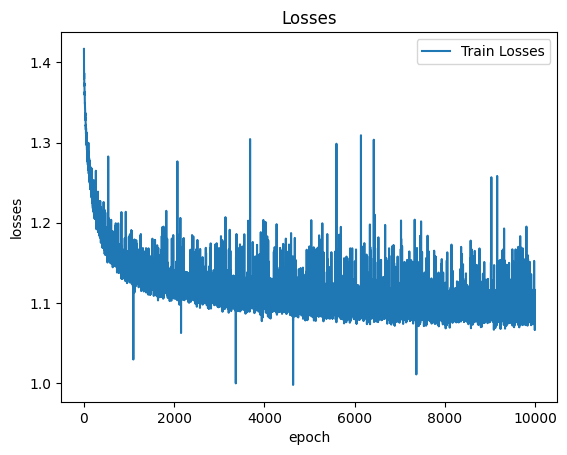

In [67]:
# Plotting the loss graph the graph of the best model
best_model.plot()
plt.show()

### Compare confusion matrix with custom and sklearn

In [68]:
from sklearn.metrics import classification_report as sklearn_classification_report

# Assuming best_model is already defined based on the previous code

# Use the best model to predict
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("-" * 4, "Custom Classification report", "-" * 4)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("-" * 4, "Sklearn's Classification report", "-" * 4)
print(sklearn_report)

---- Custom Classification report ----
         precision    recall  f1_score
0         0.576361  0.655589  0.613428
1         0.360061  0.353116  0.356554
2          0.40678   0.29003  0.338624
3         0.564136  0.661043  0.608757
accuracy                      0.488679
macro     0.476834  0.489945  0.479341
weighted  0.475976  0.488679  0.478296


---- Sklearn's Classification report ----
              precision    recall  f1-score   support

           0       0.58      0.66      0.61       662
           1       0.36      0.35      0.36       674
           2       0.41      0.29      0.34       662
           3       0.56      0.66      0.61       652

    accuracy                           0.49      2650
   macro avg       0.48      0.49      0.48      2650
weighted avg       0.48      0.49      0.48      2650



# Inference

In [88]:
import cloudpickle

# save the model to disk
cloudpickle.dump(best_model, open('model/carprice_prediction_a3.model', 'wb'))

In [ ]:
# save the scaler model to disk
cloudpickle.dump(scaler, open('model/carprice_prediction_a3_scaler.model', 'wb'))

In [ ]:
# load and test 
load_model = cloudpickle.load(open('model/carprice_prediction_a3.model', 'rb'))

In [72]:
print(mlflow.__version__)

2.20.2


In [73]:
print(mlflow.get_tracking_uri())

https://mlflow.ml.brain.cs.ait.ac.th/


In [74]:

client = mlflow.tracking.MlflowClient()
models = client.search_registered_models()
for model in models:
    print(model.name)


<student_ID>-a3-model
MyLogisticRegression
ST125064-a3-model
st123699-Normal-model
st123699-Ridge-model
st124090-a3-model
st124783-a3-model
st124856-a3-model
st124876-a3-model
st124949-Normal-model
st124949-Ridge-model
st124956-a3-model
st124957-a3-model
st124957-a3-model-V1
st125041-a3-model
st125098-a3-model
st125168-a3-model
st125563-a3-model
test


In [75]:
model_name = "st125563-a3-model"

# Register the model using the correct run ID
mlflow.register_model(f"runs:/{run_id}/model", model_name)

Registered model 'st125563-a3-model' already exists. Creating a new version of this model...
2025/04/01 14:13:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125563-a3-model, version 3
Created version '3' of model 'st125563-a3-model'.


<ModelVersion: aliases=[], creation_timestamp=1743517231041, current_stage='None', description='', last_updated_timestamp=1743517231041, name='st125563-a3-model', run_id='7a44e60093cc4002a59efa678da643d4', run_link='', source='mlflow-artifacts:/311599177009085299/7a44e60093cc4002a59efa678da643d4/artifacts/model', status='READY', status_message=None, tags={}, user_id='', version='3'>

In [80]:
model_name = "st125563-a3-model"
model_version = 3

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

In [85]:
precited_selling_price= model.predict(pd.DataFrame(X_test))
precited_selling_price[:18]

array([2, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2])

In [86]:
# The actual values of y
y_test[:18]

array([2, 0, 3, 2, 3, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 3, 1, 0])

# Report

At first, we created a 4-class classification problem by binning the selling price column. Then, we implemented a LogisticRegression class with functions to compute accuracy, precision, recall, F1-score (including macro and weighted versions), and an optional Ridge penalty.

Later, we also built a custom classification report and compared it with scikit-learn’s version. Using MLflow, we logged metrics, identified the best model, and used it for predictions on the test set.

Finally, our model achieved an overall accuracy of 0.49, with F1-scores of 0.61, 0.36, 0.34, and 0.61 for classes 0, 1, 2, and 3, respectively.